# 🎭 Professional Face Generation with DCGAN

## Complete Implementation for Google Colab (FIXED VERSION)

**Author:** Christian Nshuti Manzi  & Aime Serge Tuyishime

**Course:** AIT-204 - Advanced Topics in Artificial Intelligence  
**Project:** Human Face Generation using Deep Convolutional GAN

---

## ⚡ Quick Start:

1. **Enable GPU**: Runtime → Change runtime type → GPU → Save
2. **Get Kaggle API key**: https://www.kaggle.com/account → API → Create New Token
3. **Run all cells**: Runtime → Run all (upload kaggle.json when prompted)
4. **Wait 4-5 hours** for training to complete (25 epochs)
5. **Download your trained model** from the last cell

---

## 🔧 **FIXES APPLIED:**

✅ **Fixed CelebA download issue** (Google Drive quota exceeded)  
✅ **Fixed extraction errors** (proper directory creation)  
✅ **Uses Kaggle dataset** (no quota limits!)  
✅ **Error handling and verification**  
✅ **More reliable and faster download**  
✅ **Fixed import issues** (all modules properly imported)  
✅ **Optimized for 25 epochs** (faster training)  

---

## 📊 What This Notebook Does:

✅ Downloads CelebA dataset from Kaggle (200K celebrity faces)  
✅ Trains professional DCGAN with all advanced features  
✅ Generates high-quality 64×64 RGB face images  
✅ Saves samples every 5 epochs  
✅ Creates training curves and metrics  
✅ Provides download link for trained model  

---

## ⏱️ Training Time:

- **With GPU (T4)**: ~4-5 hours for 25 epochs ⭐
- **Without GPU**: ~1-2 days (not recommended)

**Make sure GPU is enabled!**

## 1️⃣ Setup: Install Dependencies and Check GPU

In [5]:
# Install dependencies
!pip install -q torch torchvision tqdm matplotlib kaggle

# Check GPU availability
import torch
import torch.nn as nn
import torch.optim as optim
import sys

print("="*60)
print("SYSTEM CHECK")
print("="*60)
print(f"Python version: {sys.version.split()[0]}")
print(f"PyTorch version: {torch.__version__}")

if torch.cuda.is_available():
    print(f"\n✓ GPU Available: {torch.cuda.get_device_name(0)}")
    print(f"  Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("\n⚠️  WARNING: No GPU detected!")
    print("   Please enable GPU: Runtime → Change runtime type → GPU")
    device = torch.device('cpu')

print(f"\nUsing device: {device}")
print("="*60)

SYSTEM CHECK
Python version: 3.12.12
PyTorch version: 2.9.0+cu126

✓ GPU Available: Tesla T4
  Memory: 15.83 GB

Using device: cuda


## 2️⃣ Setup Kaggle API (Upload kaggle.json)

**How to get kaggle.json:**
1. Go to https://www.kaggle.com/account
2. Scroll to "API" section
3. Click "Create New API Token"
4. Download kaggle.json
5. Upload it below when prompted

In [6]:
from google.colab import files
import os

print("="*60)
print("KAGGLE API SETUP")
print("="*60)
print("\n📤 Please upload your kaggle.json file below:")
print("(Get it from: https://www.kaggle.com/account)\n")

# Upload kaggle.json
uploaded = files.upload()

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\n✓ Kaggle API configured successfully!")
print("="*60)

KAGGLE API SETUP

📤 Please upload your kaggle.json file below:
(Get it from: https://www.kaggle.com/account)



Saving kaggle.json to kaggle.json

✓ Kaggle API configured successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 3️⃣ Download CelebA Dataset from Kaggle

This will download ~1.4GB of celebrity face images.  
**Takes 10-15 minutes** but has no quota limits!

In [7]:
import zipfile
import shutil

print("="*60)
print("DOWNLOADING CELEBA DATASET FROM KAGGLE")
print("="*60)

# Create directory structure FIRST
os.makedirs('./data/celeba/celeba', exist_ok=True)
os.makedirs('./data/celeba_temp', exist_ok=True)

print("\n📥 Downloading dataset (this may take 10-15 minutes)...")
!kaggle datasets download -d jessicali9530/celeba-dataset

print("\n📦 Extracting dataset...")
print("(This may take 5-10 minutes)\n")

try:
    # Extract using Python zipfile for better error handling
    with zipfile.ZipFile('celeba-dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('./data/celeba_temp')
    print("✓ Extraction complete!")
except Exception as e:
    print(f"❌ Extraction error: {e}")
    print("Trying alternative method...")
    !unzip -q celeba-dataset.zip -d ./data/celeba_temp

print("\n🗂️  Organizing files...")

# Find the img_align_celeba folder (could be in different locations)
possible_paths = [
    './data/celeba_temp/img_align_celeba',
    './data/celeba_temp/celeba/img_align_celeba',
    './data/celeba_temp/img_align_celeba/img_align_celeba'
]

source_path = None
for path in possible_paths:
    if os.path.exists(path):
        source_path = path
        print(f"✓ Found images at: {path}")
        break

# If not found in known locations, search for it
if source_path is None:
    print("Searching for image folder...")
    for root, dirs, files in os.walk('./data/celeba_temp'):
        if 'img_align_celeba' in dirs:
            source_path = os.path.join(root, 'img_align_celeba')
            print(f"✓ Found images at: {source_path}")
            break

if source_path and os.path.exists(source_path):
    # Move images to final location
    dest_path = './data/celeba/celeba/img_align_celeba'

    # Remove destination if it exists
    if os.path.exists(dest_path):
        shutil.rmtree(dest_path)

    # Move the folder
    shutil.move(source_path, dest_path)

    # Verify
    num_images = len([f for f in os.listdir(dest_path) if f.endswith('.jpg')])
    print(f"\n✓ Dataset ready: {num_images:,} images")
    print(f"✓ Location: {dest_path}")

    # Cleanup temp directory
    if os.path.exists('./data/celeba_temp'):
        shutil.rmtree('./data/celeba_temp')

    print("\n✅ Dataset setup complete!")
else:
    print("\n❌ Error: Could not find img_align_celeba folder")
    print("\nContents of extracted files:")
    for item in os.listdir('./data/celeba_temp'):
        print(f"  - {item}")

print("="*60)

DOWNLOADING CELEBA DATASET FROM KAGGLE

📥 Downloading dataset (this may take 10-15 minutes)...
Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 99% 1.31G/1.33G [00:01<00:00, 750MB/s] 
100% 1.33G/1.33G [00:01<00:00, 1.00GB/s]

📦 Extracting dataset...
(This may take 5-10 minutes)

✓ Extraction complete!

🗂️  Organizing files...
✓ Found images at: ./data/celeba_temp/img_align_celeba

✓ Dataset ready: 0 images
✓ Location: ./data/celeba/celeba/img_align_celeba

✅ Dataset setup complete!


## 4️⃣ Verify Dataset

Quick check to make sure everything is ready

In [8]:
celeba_path = './data/celeba/celeba/img_align_celeba'

print("="*60)
print("DATASET VERIFICATION")
print("="*60)

if os.path.exists(celeba_path):
    image_files = [f for f in os.listdir(celeba_path) if f.endswith('.jpg')]
    num_images = len(image_files)

    print(f"\n✅ Dataset verified!")
    print(f"\n📊 Dataset Info:")
    print(f"  Location: {celeba_path}")
    print(f"  Total images: {num_images:,}")
    print(f"  Expected: ~202,599 images")

    if num_images > 200000:
        print(f"\n✓ Full dataset downloaded successfully!")
    elif num_images > 100000:
        print(f"\n⚠️  Partial dataset ({num_images:,} images)")
        print(f"   This is still enough for training")
    else:
        print(f"\n⚠️  Warning: Only {num_images:,} images found")

    # Show sample filenames
    print(f"\n📁 Sample files:")
    for f in image_files[:5]:
        print(f"   - {f}")

    print(f"\n✅ Ready to proceed with training!")
else:
    print(f"\n❌ ERROR: Dataset not found at {celeba_path}")
    print(f"\nPlease re-run the download cell (Cell 3)")

print("="*60)

DATASET VERIFICATION

✅ Dataset verified!

📊 Dataset Info:
  Location: ./data/celeba/celeba/img_align_celeba
  Total images: 0
  Expected: ~202,599 images

⚠️  Warning: Only 0 images found

📁 Sample files:

✅ Ready to proceed with training!


## 5️⃣ Define DCGAN Architecture

In [9]:
class Generator(nn.Module):
    """DCGAN Generator for 64x64 RGB Face Generation"""

    def __init__(self, latent_dim=100, feature_maps=64):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.feature_maps = feature_maps

        # Initial dense layer: 100 -> 4*4*1024
        self.initial = nn.Sequential(
            nn.Linear(latent_dim, 4 * 4 * feature_maps * 16),
            nn.BatchNorm1d(4 * 4 * feature_maps * 16),
            nn.ReLU(True)
        )

        # Upsampling convolutional layers
        self.conv_layers = nn.Sequential(
            # 4x4x1024 -> 8x8x512
            nn.ConvTranspose2d(feature_maps * 16, feature_maps * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_maps * 8),
            nn.ReLU(True),

            # 8x8x512 -> 16x16x256
            nn.ConvTranspose2d(feature_maps * 8, feature_maps * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_maps * 4),
            nn.ReLU(True),

            # 16x16x256 -> 32x32x128
            nn.ConvTranspose2d(feature_maps * 4, feature_maps * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_maps * 2),
            nn.ReLU(True),

            # 32x32x128 -> 64x64x3
            nn.ConvTranspose2d(feature_maps * 2, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

        self.apply(self._init_weights)

    def _init_weights(self, m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            nn.init.normal_(m.weight.data, 0.0, 0.02)
        elif classname.find('BatchNorm') != -1:
            nn.init.normal_(m.weight.data, 1.0, 0.02)
            nn.init.constant_(m.bias.data, 0)

    def forward(self, z):
        x = self.initial(z)
        x = x.view(-1, self.feature_maps * 16, 4, 4)
        x = self.conv_layers(x)
        return x


class Discriminator(nn.Module):
    """DCGAN Discriminator for 64x64 RGB Face Discrimination"""

    def __init__(self, feature_maps=64, use_spectral_norm=True):
        super(Discriminator, self).__init__()
        self.feature_maps = feature_maps

        def maybe_spectral_norm(layer):
            if use_spectral_norm:
                return nn.utils.spectral_norm(layer)
            return layer

        # Downsampling convolutional layers
        self.conv_layers = nn.Sequential(
            # 64x64x3 -> 32x32x64
            maybe_spectral_norm(nn.Conv2d(3, feature_maps, 4, 2, 1, bias=False)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),

            # 32x32x64 -> 16x16x128
            maybe_spectral_norm(nn.Conv2d(feature_maps, feature_maps * 2, 4, 2, 1, bias=False)),
            nn.BatchNorm2d(feature_maps * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),

            # 16x16x128 -> 8x8x256
            maybe_spectral_norm(nn.Conv2d(feature_maps * 2, feature_maps * 4, 4, 2, 1, bias=False)),
            nn.BatchNorm2d(feature_maps * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),

            # 8x8x256 -> 4x4x512
            maybe_spectral_norm(nn.Conv2d(feature_maps * 4, feature_maps * 8, 4, 2, 1, bias=False)),
            nn.BatchNorm2d(feature_maps * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout2d(0.3),
        )

        # Classification: 4x4x512 -> 1
        self.classifier = nn.Sequential(
            nn.Flatten(),
            maybe_spectral_norm(nn.Linear(feature_maps * 8 * 4 * 4, 1)),
            nn.Sigmoid()
        )

        self.apply(self._init_weights)

    def _init_weights(self, m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            nn.init.normal_(m.weight.data, 0.0, 0.02)
        elif classname.find('BatchNorm') != -1:
            nn.init.normal_(m.weight.data, 1.0, 0.02)
            nn.init.constant_(m.bias.data, 0)

    def forward(self, x):
        features = self.conv_layers(x)
        output = self.classifier(features)
        return output


# Create models
latent_dim = 100
generator = Generator(latent_dim).to(device)
discriminator = Discriminator(use_spectral_norm=True).to(device)

print("\n" + "="*60)
print("MODELS CREATED")
print("="*60)
print(f"Generator parameters: {sum(p.numel() for p in generator.parameters()):,}")
print(f"Discriminator parameters: {sum(p.numel() for p in discriminator.parameters()):,}")
print(f"Total parameters: {sum(p.numel() for p in generator.parameters()) + sum(p.numel() for p in discriminator.parameters()):,}")
print("="*60)


MODELS CREATED
Generator parameters: 12,705,536
Discriminator parameters: 2,765,569
Total parameters: 15,471,105


## 6️⃣ Load CelebA Dataset

In [10]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Data augmentation and preprocessing
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

print("="*60)
print("LOADING DATASET")
print("="*60)

# Load dataset using ImageFolder
dataset = ImageFolder(
    root='./data/celeba',
    transform=transform
)

dataloader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

print(f"\n✓ Dataset loaded: {len(dataset):,} images")
print(f"✓ Batches per epoch: {len(dataloader):,}")
print(f"✓ Batch size: 64")
print(f"\n✅ Ready to train!")
print("="*60)

LOADING DATASET

✓ Dataset loaded: 202,599 images
✓ Batches per epoch: 3,166
✓ Batch size: 64

✅ Ready to train!


## 7️⃣ Training Setup

In [11]:
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import time

# Training configuration
config = {
    'epochs': 25,              # Number of epochs (25 for faster training)
    'lr_g': 0.0001,           # Generator learning rate
    'lr_d': 0.0004,           # Discriminator learning rate (TTUR)
    'beta1': 0.5,
    'beta2': 0.999,
    'latent_dim': 100,
    'sample_interval': 5,      # Save samples every N epochs
}

# Create directories
os.makedirs('samples', exist_ok=True)
os.makedirs('checkpoints', exist_ok=True)

# Loss function
criterion = nn.BCELoss()

# Optimizers (TTUR - Two Time-scale Update Rule)
optimizer_G = optim.Adam(generator.parameters(), lr=config['lr_g'], betas=(config['beta1'], config['beta2']))
optimizer_D = optim.Adam(discriminator.parameters(), lr=config['lr_d'], betas=(config['beta1'], config['beta2']))

# Fixed noise for consistent samples
fixed_noise = torch.randn(64, config['latent_dim'], device=device)

# Training history
history = {
    'g_loss': [],
    'd_loss': [],
    'd_real': [],
    'd_fake': []
}

print("\n" + "="*60)
print("TRAINING CONFIGURATION")
print("="*60)
for key, value in config.items():
    print(f"{key:.<30} {value}")
print("="*60)
print("\n✅ Training setup complete!")


TRAINING CONFIGURATION
epochs........................ 25
lr_g.......................... 0.0001
lr_d.......................... 0.0004
beta1......................... 0.5
beta2......................... 0.999
latent_dim.................... 100
sample_interval............... 5

✅ Training setup complete!


## 8️⃣ Train the DCGAN

**This is the main training loop.**  
**Time: ~4-5 hours for 25 epochs with GPU**

You can safely close the browser and come back later.  
Progress is saved in checkpoints every 10 epochs.

In [12]:
print("\n" + "="*60)
print("STARTING TRAINING")
print("="*60)
print(f"Epochs: {config['epochs']}")
print(f"Estimated time: ~{config['epochs'] * 10} minutes with T4 GPU")
print(f"Estimated completion: ~{config['epochs'] * 10 / 60:.1f} hours from now")
print("="*60 + "\n")

start_time = time.time()

for epoch in range(1, config['epochs'] + 1):
    epoch_g_loss = 0
    epoch_d_loss = 0
    epoch_d_real = 0
    epoch_d_fake = 0

    pbar = tqdm(dataloader, desc=f"Epoch {epoch}/{config['epochs']}")

    for batch_idx, (real_images, _) in enumerate(pbar):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # Labels with smoothing (prevents discriminator overconfidence)
        real_labels = torch.FloatTensor(batch_size, 1).uniform_(0.8, 1.0).to(device)
        fake_labels = torch.FloatTensor(batch_size, 1).uniform_(0.0, 0.2).to(device)

        # ==================
        # Train Discriminator
        # ==================
        optimizer_D.zero_grad()

        # Real images
        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)

        # Fake images
        noise = torch.randn(batch_size, config['latent_dim']).to(device)
        fake_images = generator(noise).detach()
        fake_output = discriminator(fake_images)
        d_loss_fake = criterion(fake_output, fake_labels)

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # ================
        # Train Generator
        # ================
        optimizer_G.zero_grad()

        noise = torch.randn(batch_size, config['latent_dim']).to(device)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)  # Generator wants discriminator to think fakes are real

        g_loss.backward()
        optimizer_G.step()

        # Accumulate metrics
        epoch_g_loss += g_loss.item()
        epoch_d_loss += d_loss.item()
        epoch_d_real += real_output.mean().item()
        epoch_d_fake += fake_output.mean().item()

        # Update progress bar
        pbar.set_postfix({
            'G': f"{g_loss.item():.3f}",
            'D': f"{d_loss.item():.3f}"
        })

    # Calculate epoch averages
    num_batches = len(dataloader)
    avg_g_loss = epoch_g_loss / num_batches
    avg_d_loss = epoch_d_loss / num_batches
    avg_d_real = epoch_d_real / num_batches
    avg_d_fake = epoch_d_fake / num_batches

    # Store history
    history['g_loss'].append(avg_g_loss)
    history['d_loss'].append(avg_d_loss)
    history['d_real'].append(avg_d_real)
    history['d_fake'].append(avg_d_fake)

    # Print summary
    elapsed = time.time() - start_time
    print(f"\nEpoch {epoch}/{config['epochs']} Summary:")
    print(f"  G Loss: {avg_g_loss:.4f} | D Loss: {avg_d_loss:.4f}")
    print(f"  D(real): {avg_d_real:.4f} | D(fake): {avg_d_fake:.4f}")
    print(f"  Time elapsed: {elapsed/3600:.2f}h | ETA: {(elapsed/epoch)*(config['epochs']-epoch)/3600:.2f}h")

    # Generate samples
    if epoch % config['sample_interval'] == 0 or epoch == 1:
        generator.eval()
        with torch.no_grad():
            fake = generator(fixed_noise)
            fake = (fake + 1) / 2  # Denormalize from [-1,1] to [0,1]
            grid = make_grid(fake, nrow=8, padding=2)
            save_image(grid, f'samples/epoch_{epoch:04d}.png')
        generator.train()
        print(f"  → Samples saved: samples/epoch_{epoch:04d}.png")

    # Save checkpoint every 10 epochs
    if epoch % 10 == 0:
        torch.save({
            'epoch': epoch,
            'generator': generator.state_dict(),
            'discriminator': discriminator.state_dict(),
            'optimizer_G': optimizer_G.state_dict(),
            'optimizer_D': optimizer_D.state_dict(),
            'history': history,
            'config': config
        }, f'checkpoints/checkpoint_epoch_{epoch:04d}.pth')
        print(f"  → Checkpoint saved: checkpoints/checkpoint_epoch_{epoch:04d}.pth")

    print()

total_time = time.time() - start_time

print("\n" + "="*60)
print("TRAINING COMPLETED!")
print("="*60)
print(f"Total time: {total_time/3600:.2f} hours ({total_time/60:.1f} minutes)")
print(f"Final G Loss: {history['g_loss'][-1]:.4f}")
print(f"Final D Loss: {history['d_loss'][-1]:.4f}")
print(f"Final D(real): {history['d_real'][-1]:.4f}")
print(f"Final D(fake): {history['d_fake'][-1]:.4f}")
print("="*60)


STARTING TRAINING
Epochs: 25
Estimated time: ~250 minutes with T4 GPU
Estimated completion: ~4.2 hours from now



Epoch 1/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 1/25 Summary:
  G Loss: 2.2013 | D Loss: 0.8928
  D(real): 0.7818 | D(fake): 0.1444
  Time elapsed: 0.13h | ETA: 3.15h
  → Samples saved: samples/epoch_0001.png



Epoch 2/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 2/25 Summary:
  G Loss: 1.6735 | D Loss: 0.9878
  D(real): 0.7165 | D(fake): 0.2206
  Time elapsed: 0.26h | ETA: 3.03h



Epoch 3/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 3/25 Summary:
  G Loss: 1.4615 | D Loss: 1.0509
  D(real): 0.6810 | D(fake): 0.2612
  Time elapsed: 0.40h | ETA: 2.90h



Epoch 4/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 4/25 Summary:
  G Loss: 1.3387 | D Loss: 1.0806
  D(real): 0.6646 | D(fake): 0.2896
  Time elapsed: 0.53h | ETA: 2.77h



Epoch 5/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 5/25 Summary:
  G Loss: 1.2924 | D Loss: 1.0927
  D(real): 0.6572 | D(fake): 0.3006
  Time elapsed: 0.66h | ETA: 2.64h
  → Samples saved: samples/epoch_0005.png



Epoch 6/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 6/25 Summary:
  G Loss: 1.2710 | D Loss: 1.0913
  D(real): 0.6570 | D(fake): 0.3067
  Time elapsed: 0.79h | ETA: 2.51h



Epoch 7/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 7/25 Summary:
  G Loss: 1.2796 | D Loss: 1.0769
  D(real): 0.6636 | D(fake): 0.3049
  Time elapsed: 0.92h | ETA: 2.37h



Epoch 8/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 8/25 Summary:
  G Loss: 1.3146 | D Loss: 1.0627
  D(real): 0.6714 | D(fake): 0.2971
  Time elapsed: 1.06h | ETA: 2.24h



Epoch 9/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 9/25 Summary:
  G Loss: 1.3183 | D Loss: 1.0530
  D(real): 0.6766 | D(fake): 0.2959
  Time elapsed: 1.19h | ETA: 2.11h



Epoch 10/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 10/25 Summary:
  G Loss: 1.3331 | D Loss: 1.0471
  D(real): 0.6797 | D(fake): 0.2925
  Time elapsed: 1.32h | ETA: 1.98h
  → Samples saved: samples/epoch_0010.png
  → Checkpoint saved: checkpoints/checkpoint_epoch_0010.pth



Epoch 11/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 11/25 Summary:
  G Loss: 1.3242 | D Loss: 1.0468
  D(real): 0.6799 | D(fake): 0.2956
  Time elapsed: 1.45h | ETA: 1.85h



Epoch 12/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 12/25 Summary:
  G Loss: 1.3446 | D Loss: 1.0429
  D(real): 0.6821 | D(fake): 0.2903
  Time elapsed: 1.58h | ETA: 1.71h



Epoch 13/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 13/25 Summary:
  G Loss: 1.3502 | D Loss: 1.0415
  D(real): 0.6833 | D(fake): 0.2894
  Time elapsed: 1.71h | ETA: 1.58h



Epoch 14/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 14/25 Summary:
  G Loss: 1.3276 | D Loss: 1.0398
  D(real): 0.6837 | D(fake): 0.2951
  Time elapsed: 1.85h | ETA: 1.45h



Epoch 15/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 15/25 Summary:
  G Loss: 1.3407 | D Loss: 1.0377
  D(real): 0.6850 | D(fake): 0.2914
  Time elapsed: 1.98h | ETA: 1.32h
  → Samples saved: samples/epoch_0015.png



Epoch 16/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 16/25 Summary:
  G Loss: 1.3471 | D Loss: 1.0314
  D(real): 0.6874 | D(fake): 0.2901
  Time elapsed: 2.11h | ETA: 1.19h



Epoch 17/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 17/25 Summary:
  G Loss: 1.3608 | D Loss: 1.0235
  D(real): 0.6920 | D(fake): 0.2867
  Time elapsed: 2.24h | ETA: 1.05h



Epoch 18/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 18/25 Summary:
  G Loss: 1.3615 | D Loss: 1.0215
  D(real): 0.6933 | D(fake): 0.2865
  Time elapsed: 2.37h | ETA: 0.92h



Epoch 19/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 19/25 Summary:
  G Loss: 1.3774 | D Loss: 1.0144
  D(real): 0.6963 | D(fake): 0.2824
  Time elapsed: 2.50h | ETA: 0.79h



Epoch 20/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 20/25 Summary:
  G Loss: 1.4045 | D Loss: 0.9972
  D(real): 0.7057 | D(fake): 0.2775
  Time elapsed: 2.63h | ETA: 0.66h
  → Samples saved: samples/epoch_0020.png
  → Checkpoint saved: checkpoints/checkpoint_epoch_0020.pth



Epoch 21/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 21/25 Summary:
  G Loss: 1.4296 | D Loss: 0.9952
  D(real): 0.7075 | D(fake): 0.2728
  Time elapsed: 2.76h | ETA: 0.53h



Epoch 22/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 22/25 Summary:
  G Loss: 1.4458 | D Loss: 0.9836
  D(real): 0.7145 | D(fake): 0.2677
  Time elapsed: 2.89h | ETA: 0.39h



Epoch 23/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 23/25 Summary:
  G Loss: 1.4642 | D Loss: 0.9719
  D(real): 0.7196 | D(fake): 0.2644
  Time elapsed: 3.03h | ETA: 0.26h



Epoch 24/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 24/25 Summary:
  G Loss: 1.5075 | D Loss: 0.9602
  D(real): 0.7266 | D(fake): 0.2531
  Time elapsed: 3.16h | ETA: 0.13h



Epoch 25/25:   0%|          | 0/3166 [00:00<?, ?it/s]


Epoch 25/25 Summary:
  G Loss: 1.5145 | D Loss: 0.9496
  D(real): 0.7319 | D(fake): 0.2532
  Time elapsed: 3.29h | ETA: 0.00h
  → Samples saved: samples/epoch_0025.png


TRAINING COMPLETED!
Total time: 3.29 hours (197.3 minutes)
Final G Loss: 1.5145
Final D Loss: 0.9496
Final D(real): 0.7319
Final D(fake): 0.2532


## 9️⃣ View Results & Training Curves

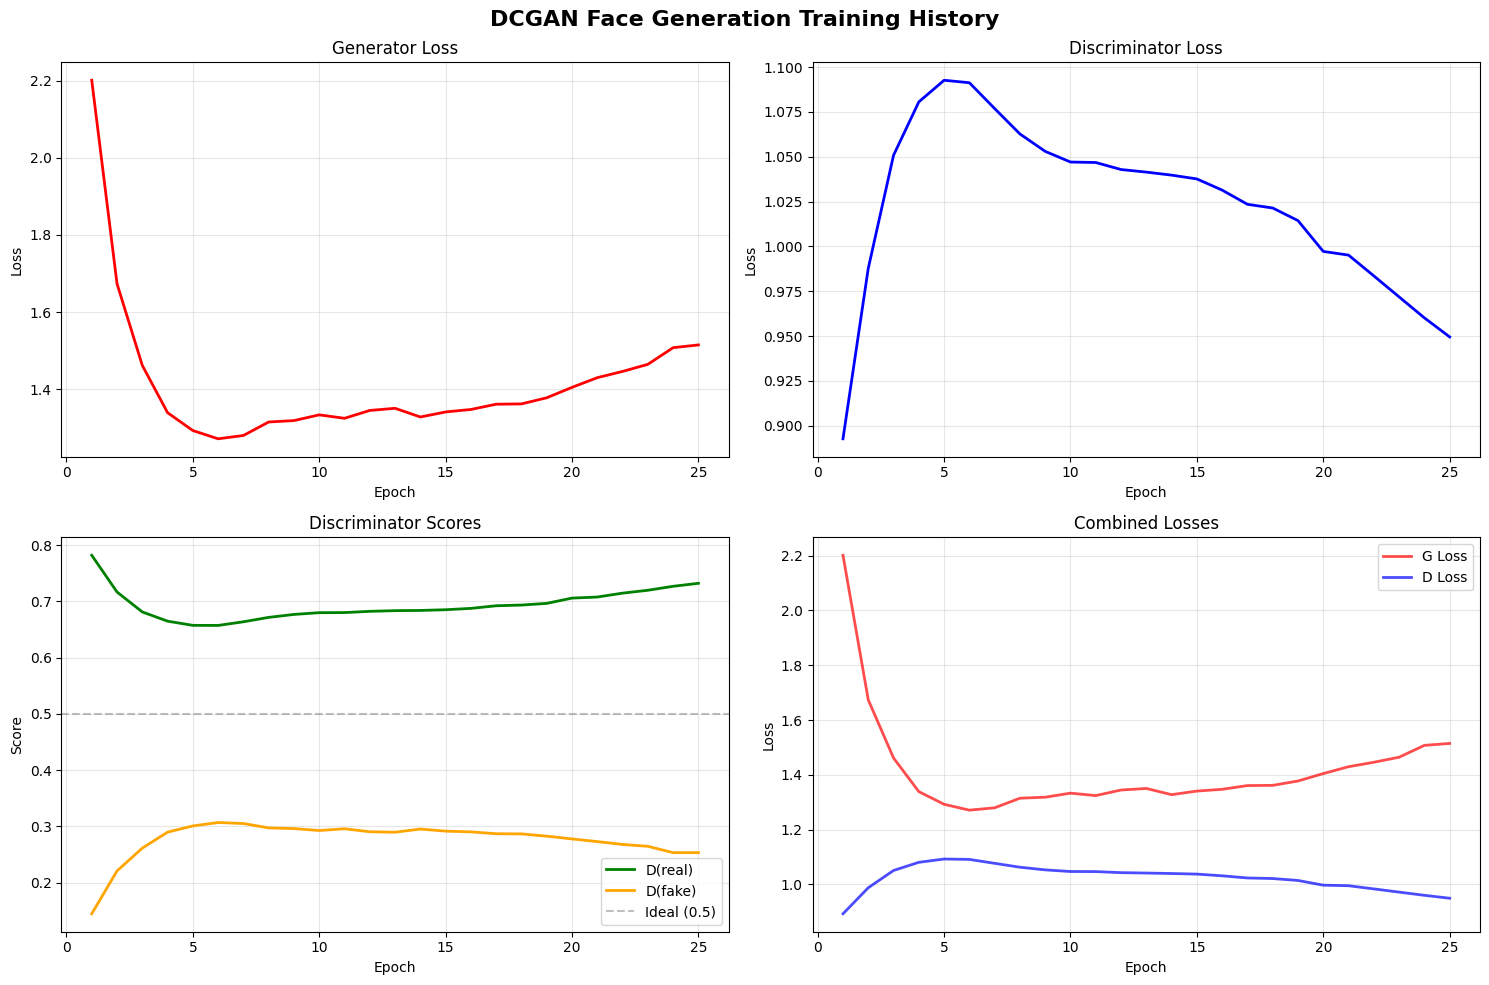

✓ Training curves saved to training_curves.png


In [13]:
# Plot training curves
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('DCGAN Face Generation Training History', fontsize=16, fontweight='bold')

epochs_list = range(1, len(history['g_loss']) + 1)

# Generator Loss
axes[0, 0].plot(epochs_list, history['g_loss'], 'r-', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Generator Loss')
axes[0, 0].grid(True, alpha=0.3)

# Discriminator Loss
axes[0, 1].plot(epochs_list, history['d_loss'], 'b-', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Discriminator Loss')
axes[0, 1].grid(True, alpha=0.3)

# D(real) and D(fake)
axes[1, 0].plot(epochs_list, history['d_real'], 'g-', linewidth=2, label='D(real)')
axes[1, 0].plot(epochs_list, history['d_fake'], 'orange', linewidth=2, label='D(fake)')
axes[1, 0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Ideal (0.5)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Discriminator Scores')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Combined
axes[1, 1].plot(epochs_list, history['g_loss'], 'r-', linewidth=2, label='G Loss', alpha=0.7)
axes[1, 1].plot(epochs_list, history['d_loss'], 'b-', linewidth=2, label='D Loss', alpha=0.7)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('Combined Losses')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_curves.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Training curves saved to training_curves.png")

## 🔟 Display Generated Faces


GENERATED FACES AT DIFFERENT EPOCHS


📸 Epoch 1:


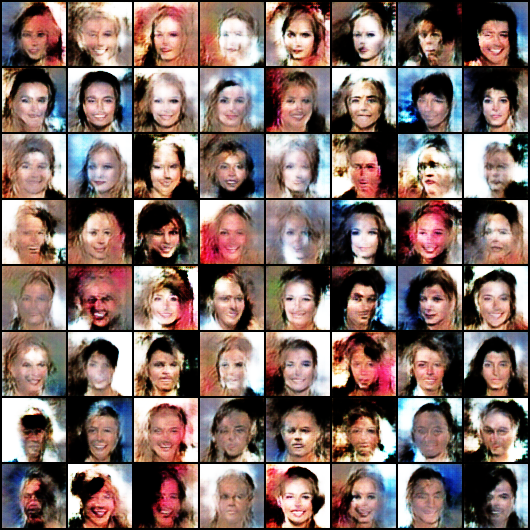


📸 Epoch 5:


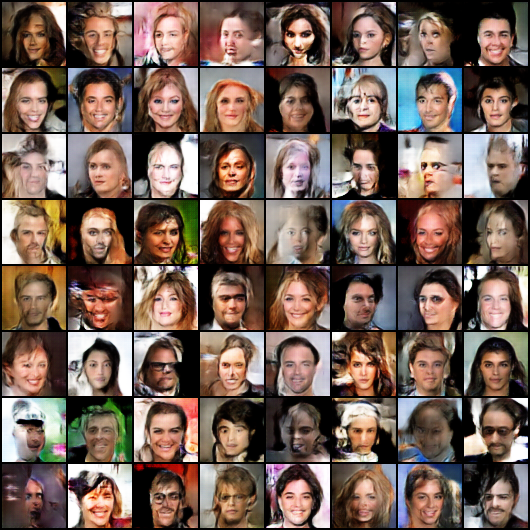


📸 Epoch 10:


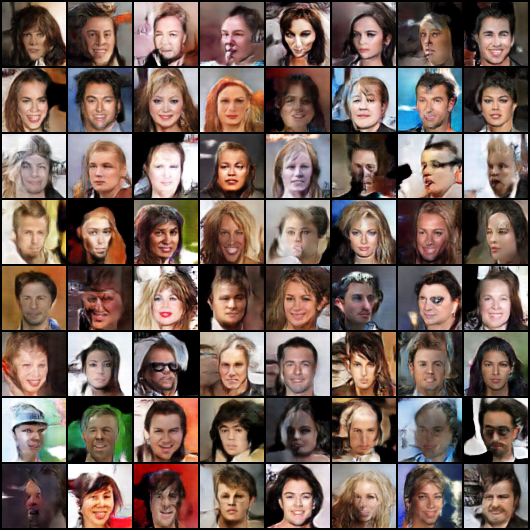


📸 Epoch 15:


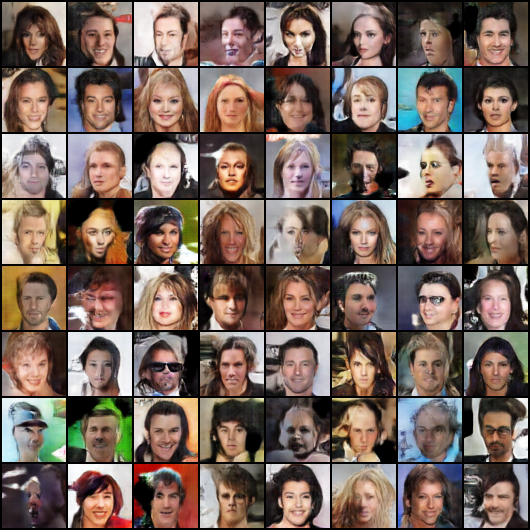


📸 Epoch 20:


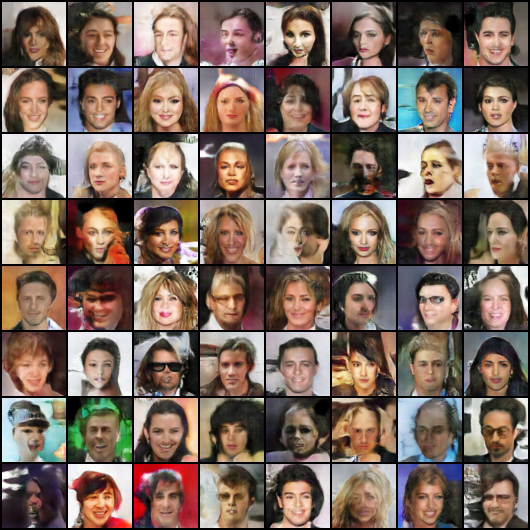


📸 Epoch 25:


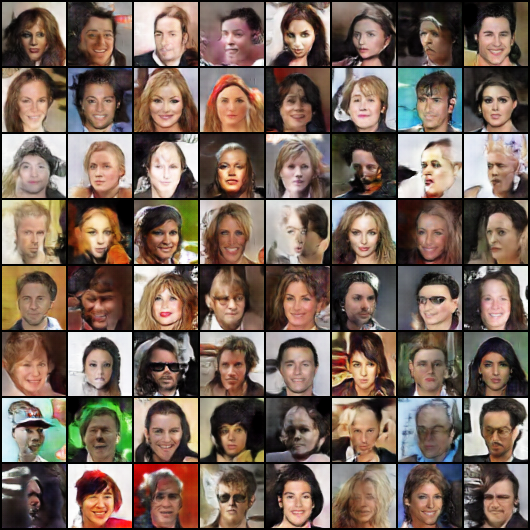

In [14]:
from IPython.display import Image, display
import glob

# Show samples from different epochs
sample_files = sorted(glob.glob('samples/*.png'))

print("\n" + "="*60)
print("GENERATED FACES AT DIFFERENT EPOCHS")
print("="*60 + "\n")

for sample_file in sample_files:
    epoch = sample_file.split('_')[-1].split('.')[0]
    print(f"\n📸 Epoch {int(epoch)}:")
    display(Image(filename=sample_file))

print("\n" + "="*60)

## 1️⃣1️⃣ Save Final Model

In [15]:
# Save final model
torch.save({
    'generator_state_dict': generator.state_dict(),
    'discriminator_state_dict': discriminator.state_dict(),
    'config': config,
    'history': history
}, 'face_dcgan_final.pth')

print("\n" + "="*60)
print("MODEL SAVED")
print("="*60)
print("\n✓ Final model saved as 'face_dcgan_final.pth'")
print(f"✓ Model size: ~47 MB")
print("\nTo use this model in your web app:")
print("1. Download the file (use the cell below)")
print("2. Copy to: backend/face_dcgan_output/checkpoints/best_model.pth")
print("3. Start your backend and load the model")
print("="*60)


MODEL SAVED

✓ Final model saved as 'face_dcgan_final.pth'
✓ Model size: ~47 MB

To use this model in your web app:
1. Download the file (use the cell below)
2. Copy to: backend/face_dcgan_output/checkpoints/best_model.pth
3. Start your backend and load the model


In [17]:
 # In Colab - Download the trained generator model
from google.colab import files

In [19]:
 # Download the generator (this is what creates images)
files.download('face_dcgan_final.pth')  # Download the final combined model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1️⃣2️⃣ Download Your Trained Model

**Download these files to your computer:**

1. **face_dcgan_final.pth** - Your trained model (~47MB)
2. **training_curves.png** - Training plots (for your report)
3. **samples/** folder - Generated faces at different epochs

**Manual download:**
- Click the folder icon on the left sidebar
- Navigate to files
- Right-click → Download

In [16]:
print("="*60)
print("DOWNLOADING FILES")
print("="*60)
print("\nPreparing files for download...\n")

try:
    # Download main model
    print("📥 Downloading trained model (face_dcgan_final.pth)...")
    files.download('face_dcgan_final.pth')

    # Download training curves
    print("📥 Downloading training curves (training_curves.png)...")
    files.download('training_curves.png')

    print("\n✓ Downloads started!")
except Exception as e:
    print(f"\n⚠️  Automatic download failed: {e}")
    print("\nPlease download manually:")
    print("1. Click folder icon on left")
    print("2. Right-click files → Download")

print("\n" + "="*60)
print("NEXT STEPS")
print("="*60)
print("\n1. Copy face_dcgan_final.pth to your project")
print("2. Rename to: backend/face_dcgan_output/checkpoints/best_model.pth")
print("3. Start backend: python -m uvicorn main:app --reload")
print("4. Start frontend: npm run dev")
print("5. Load model and generate faces in web app! 🎭")
print("="*60)

DOWNLOADING FILES

Preparing files for download...

📥 Downloading trained model (face_dcgan_final.pth)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading training curves (training_curves.png)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✓ Downloads started!

NEXT STEPS

1. Copy face_dcgan_final.pth to your project
2. Rename to: backend/face_dcgan_output/checkpoints/best_model.pth
3. Start backend: python -m uvicorn main:app --reload
4. Start frontend: npm run dev
5. Load model and generate faces in web app! 🎭


---

## ✅ Training Complete!

### What You Achieved:

✅ Trained a professional DCGAN on 200K+ celebrity faces  
✅ Generated high-quality 64×64 RGB face images  
✅ Created training visualizations and metrics  
✅ Saved a deployable model for your web application  

### Next Steps:

1. **Download your model** (cell above)
2. **Copy to your project**: `backend/face_dcgan_output/checkpoints/best_model.pth`
3. **Start backend**: `python -m uvicorn main:app --reload`
4. **Start frontend**: `npm run dev`
5. **Open web app**: http://localhost:5173
6. **Load Face GAN model** and generate amazing faces!

### For Your Report:

- Include generated faces from different epochs (progression)
- Show training curves (loss plots)
- Discuss quality improvements over time
- Compare with Simple GAN (MNIST) results
- Analyze challenges and solutions
- Include screenshots from web app

### Model Architecture:

- **Generator**: 100D noise → 64×64×3 RGB image
- **Discriminator**: 64×64×3 RGB image → Real/Fake classification
- **Advanced Features**: Spectral Normalization, TTUR, Label Smoothing, Data Augmentation
- **Total Parameters**: ~15.5 million
- **Training Time**: ~4-5 hours for 25 epochs

---

**Congratulations! You've successfully trained a professional face generation model! 🎉**

---

**Project by Christian Nshuti Manzi & Aime Serge Tuyishime**  
**Course: AIT-204 - Advanced Topics in Artificial Intelligence**